### **SECTION #1**  
#### September 9, 2022

*Create a copy of this Jupyter notebook in your own folder.*

# Table of Contents
1. [Lecture recap](#Lecture-recap)
1. [Using R for data visualization](#Using-R-for-data-visualization)
1. [Exercises](#Exercises)

## Lecture recap

xx talk about 5 functions

xx talk about thursday's class

## Using R for data visualization

xx show them how to plot class graphs

## Exercises

### Exercise 1: The relationship between CO2 emissions and GDP

Today we are going to use data from the World Bank’s World Development Indicators (WDI). `wdi` contains the GDP and population data for 1994 and 2019; and `wdi_advars` includes five other variables:

* CO2: CO2 emissions (metric tons per capita)
* CHE: Mortality rate, infant (per 1,000 live births)
* ALITRT: Current health expenditure (% of GDP)
* IMRT: Literacy rate, adult total (% of people ages 15 and above)
* PARL: Proportion of seats held by women in national parliaments (%) 

In [57]:
library(tidyverse)
library(readxl)

wdi <- read_excel("WDI Data Extract.xlsx", 
                  sheet = 2)

wdi_advars <- read_excel("WDI Data Extract.xlsx", 
                         sheet = 3)

1. Sometimes we need to combine information from two different datasets. We can use the `merge` function to join two datasets by one or more common key variables. The syntax is: `merge(dataset1,dataset2,by="ID")`. Merge `wdi` and `wdi_advars` using Country as the key variable.

In [58]:
wdi_all <- merge(wdi,wdi_advars,by="Country")

2. Examine the first 10 rows of the data.

In [59]:
head(wdi_all, 10)

,Country,GDP_1994,GDP_2019,POP_1994,POP_2019,CO2_2016,CHE_2017,ALITRT_2018,IMRT_2018,PARL_2019,GDP_2016,GDP_2017,GDP_2018,POP_2016,POP_2017,POP_2018
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,NA,21739593382,17075727,38041754,0.2451014,11.777194,43.01972,47.9,27.86885,20206376461,20744935406,21126660586,35383128,36296400,37172386
2,Albania,4791372056,14868516511,3207536,2854191,1.5771626,NA,98.14115,7.8,29.50820,13465406060,13977387391,14546448944,2876101,2873457,2866376
3,Algeria,89791622831,202805017529,28213774,43053054,3.6991560,6.374322,81.40784,20.1,25.75758,195871280745,198417607392,201195453898,40551404,41389198,42228429
4,American Samoa,NA,NA,52095,55312,NA,NA,NA,NA,NA,534555066,503259912,514255507,55741,55620,55465
5,Andorra,2024227689,3539838261,62677,77142,6.0723702,10.320552,NA,2.7,46.42857,3409412701,3421211719,3475566751,77297,77001,77006
6,Angola,23311735184,98769677172,13503747,31825295,1.2028606,2.791500,NA,51.6,30.00000,101822893033,101673002180,99635905543,28842484,29816748,30809762
7,Antigua and Barbuda,804286308,1525046720,67204,97118,5.8965587,4.533532,NA,5.0,11.11111,1315622165,1357005634,1457277456,94527,95426,96286
8,Argentina,274830720367,437215091207,34402672,44938712,4.6190855,9.124315,99.00387,8.8,40.15748,446342760088,458253820043,446880911358,43590368,44044811,44494502
9,Armenia,3137842747,13996188673,3283667,2957731,1.7559760,10.362705,NA,11.0,23.48485,11501998665,12364648565,13007610290,2936146,2944809,2951776


3. CO2 emissions, per capita (metric tons) are measured as the total amount of carbon dioxide emitted by the country as a consequence of all relevant human (production and consumption) activities, divided by the population of the country. Suppose that we are interested in identifying the countries with the highest number of emissions. Use the `mutate` function to create a new variable with total number of CO2 emissions.

In [60]:
wdi_all <- wdi_all %>% 
    mutate(CO2_total_2016 = CO2_2016 * POP_2016)
head(wdi_all)

,Country,GDP_1994,GDP_2019,POP_1994,POP_2019,CO2_2016,CHE_2017,ALITRT_2018,IMRT_2018,PARL_2019,GDP_2016,GDP_2017,GDP_2018,POP_2016,POP_2017,POP_2018,CO2_total_2016
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,NA,21739593382,17075727,38041754,0.2451014,11.777194,43.01972,47.9,27.86885,20206376461,20744935406,21126660586,35383128,36296400,37172386,8672455
2,Albania,4791372056,14868516511,3207536,2854191,1.5771626,NA,98.14115,7.8,29.50820,13465406060,13977387391,14546448944,2876101,2873457,2866376,4536079
3,Algeria,89791622831,202805017529,28213774,43053054,3.6991560,6.374322,81.40784,20.1,25.75758,195871280745,198417607392,201195453898,40551404,41389198,42228429,150005969
4,American Samoa,NA,NA,52095,55312,NA,NA,NA,NA,NA,534555066,503259912,514255507,55741,55620,55465,NA
5,Andorra,2024227689,3539838261,62677,77142,6.0723702,10.320552,NA,2.7,46.42857,3409412701,3421211719,3475566751,77297,77001,77006,469376
6,Angola,23311735184,98769677172,13503747,31825295,1.2028606,2.791500,NA,51.6,30.00000,101822893033,101673002180,99635905543,28842484,29816748,30809762,34693487


4. Identify the five countries with the largest CO2 emissions in 2016 and their respective levels of CO2 emissions in 2016 using `head` and the tidyverse function `arrange`.

In [62]:
wdi_all %>%
    arrange(desc(CO2_total_2016)) %>%
    select(Country, CO2_total_2016) %>%
    head(5)

,Country,CO2_total_2016
,<chr>,<dbl>
1,China,9893037952
2,United States,5006302077
3,India,2407671526
4,Russian Federation,1732026776
5,Japan,1135886253


5. Now identify the five countries with the largest GDP in 2016 and their respective GDP in 2016.

In [96]:
wdi_all %>%
    arrange(desc(GDP_2016)) %>%
    select(Country, GDP_2016) %>%
    head(5)

,Country,GDP_2016
,<chr>,<dbl>
1,United States,1.697235e+13
2,China,9.523765e+12
3,Japan,6.019927e+12
4,Germany,3.784710e+12
5,France,2.811756e+12


6. Use the `mean` function to calculate the average number of CO2 emissions per capita in 2016. What happened?

In [65]:
mean(wdi_all$CO2_2016)

[1] NA

7. Calculate the mean using the argument na.rm = TRUE to remove missing values.

In [66]:
mean(wdi_all$CO2_2016, na.rm = TRUE)

[1] 4.795234

8. Calculate the median level of C02 emissions per capita in 2016. What drives the differences between your result for the mean and the median?

In [67]:
median(wdi_all$CO2_2016, na.rm = TRUE)

[1] 2.685654

9. What is the total GDP of all countries with C02 emissions per capita above the world median calculated in part (7)? What fraction of the total world GDP does this number represent? What does this result suggest?

We are going to do the following: <br>
9.1. Use `mutate` to create 3 columns: (1) Median CO2 emissions per capita. (2) A binary variable that flags whether CO2_2016 is above median C02 emissions per capita. (3) A variable called gdp_above that is equal to a country's GDP if its number of C02 emissions per capita is above the median and 0 otherwise. <br>
9.2. Use `summarize` and `sum` to sum total GDP and GDP of countries with CO2 per capita emissions above median. <br>
9.3. Use `mutate` again to calculate the fraction of world GDP produced in countries with above-median C02 emissions per capita. <br>

In [89]:
# Your answer here!

# START

wdi_all %>% 
    mutate(
        # Calculate the median level of world CO2 emissions per capita
        median_CO2 = median(CO2_2016, na.rm = TRUE),
        # Flag countries above average world CO2 emissions per capita
        above_world_median = CO2_2016 > median_CO2,
        # Zero-out GDP of countries above median CO2 emissions per capita
        gdp_above = ifelse(above_world_median, GDP_2016, 0)
    ) %>%
    summarize(
        # Sum up GDP of countries above median CO2 emissions per capita
        gdp_above = sum(gdp_above, na.rm = TRUE),
        # Sum up entire world GDP
        gdp_tot = sum(GDP_2016, na.rm = TRUE)) %>%
    # Calculate share of GDP in countries above median CO2 emissions per capita
    mutate(share_above = gdp_above / gdp_tot)

# END

gdp_above,gdp_tot,share_above
<dbl>,<dbl>,<dbl>
6.197767e+13,7.678461e+13,0.8071627


10. Suppose that we are interested in understanding the relationship between GDP per capita and CO2 emissions per capita emissions. Use the `mutate` function to calculate the GDP per capita per country in 2016.

In [91]:
wdi_all <- wdi_all %>%
    mutate(gdp_percap_2016 = GDP_2016 / POP_2016)

11. Use a graph to observe the association between GDP per capita (x axis) and C02 emissions per capita (y axis).

Warning message:
“Removed 30 rows containing missing values (geom_point).”


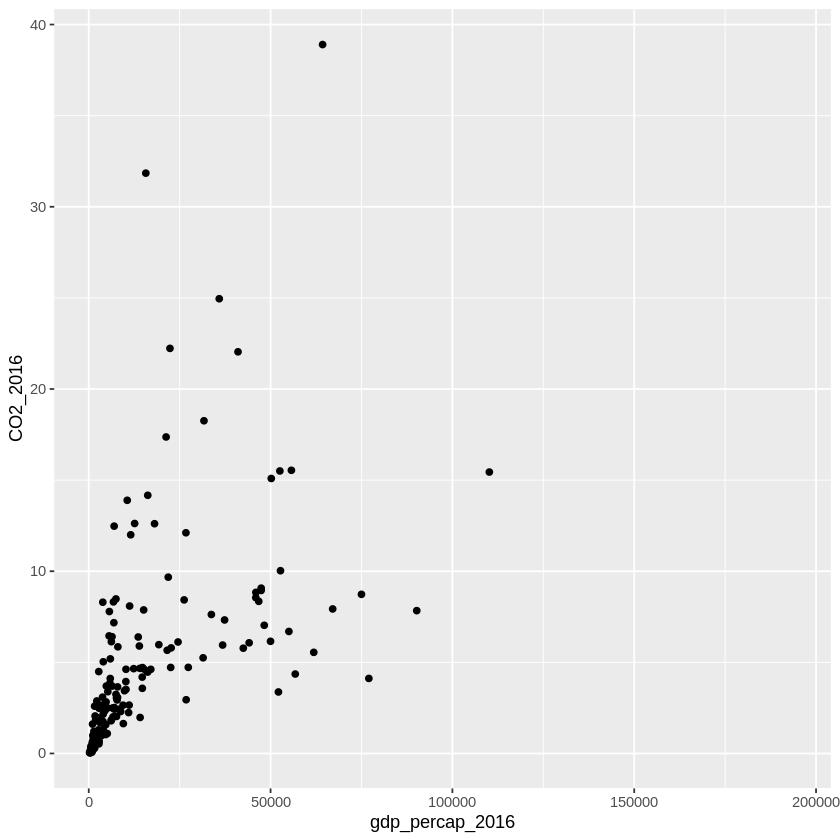

In [55]:
ggplot(wdi_all)+
geom_point(aes(x=gdp_percap_2016, y=CO2_2016))

12. Use the `cor` function to compute the correlation between both variables. Remember to deal with the missing values.

In [92]:
cor(wdi_all$gdp_percap_2016,
    wdi_all$CO2_2016, 
    use = "complete.obs")

[1] 0.5651309

### Exercise 2: Measures of central tendency and dealing with missing values

1. Calculate the mean, variance, and standard deviation of 2016 GDP using the formulas we studied in class.

In [100]:
mean <- mean(wdi_all$GDP_2016, na.rm=TRUE)
var <- sum((wdi_all$GDP_2016 - mean)^2, na.rm=TRUE) / 197
sd <- sqrt(var)
c(variance = var, sd = sd)

variance           sd 
2.297857e+24 1.515868e+12

2. Now use the functions sd() and var() to calculate the standard deviation and variance of GDP more easily. Do the results you obtain using these functions match your “manual” calculations?

In [104]:
var(wdi_all$GDP_2016, na.rm=TRUE)
sd(wdi_all$GDP_2016, na.rm=TRUE)

[1] 2.297857e+24

[1] 1.515868e+12

3. How many countries have missing values for 2016 GDP? Use the function `is.na()`.

In [111]:
sum(is.na(wdi_all$GDP_2016))

[1] 19

4. One of the countries with missing values is Bermuda. Imagine that you are told that new data has arrived and the value is 30. Create a new dataset that incorporates the updated value. How does this change the mean of GDP?

In [133]:
wdi_all[is.na(wdi_all$GDP_2016),1]
wdi_all_updated <- mutate(wdi_all,
                      GDP_2016_updated = ifelse(Country == "Bermuda", 30, GDP_2016))

[1] "Bermuda"                     "British Virgin Islands"     
 [3] "Channel Islands"             "Curacao"                    
 [5] "Djibouti"                    "Eritrea"                    
 [7] "Faroe Islands"               "French Polynesia"           
 [9] "Gibraltar"                   "Korea, Dem. People‚Äôs Rep."
[11] "Liechtenstein"               "New Caledonia"              
[13] "Sint Maarten (Dutch part)"   "Somalia"                    
[15] "South Sudan"                 "St. Martin (French part)"   
[17] "Syrian Arab Republic"        "Turks and Caicos Islands"   
[19] "Venezuela, RB"

In [136]:
mean(wdi_all_updated$GDP_2016_updated, na.rm=TRUE)

[1] 385852291798

In [135]:
mean(wdi_all$GDP_2016, na.rm=TRUE)

[1] 3.87801e+11